In [49]:
!pip install python-Levenshtein

In [50]:
from ast import literal_eval

In [51]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np,math
import re
import hashlib, random
import requests
import time
import Levenshtein
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Passowrd

In [52]:
!wget http://downloads.skullsecurity.org/passwords/rockyou-withcount.txt.bz2
!bunzip2 rockyou-withcount.txt.bz2
#!dos2unix rockyou-withcount.txt

--2025-05-15 12:12:27--  http://downloads.skullsecurity.org/passwords/rockyou-withcount.txt.bz2
Resolving downloads.skullsecurity.org (downloads.skullsecurity.org)... 172.236.108.48
Connecting to downloads.skullsecurity.org (downloads.skullsecurity.org)|172.236.108.48|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.skullsecurity.org/passwords/rockyou-withcount.txt.bz2 [following]
--2025-05-15 12:12:27--  https://downloads.skullsecurity.org/passwords/rockyou-withcount.txt.bz2
Connecting to downloads.skullsecurity.org (downloads.skullsecurity.org)|172.236.108.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59500255 (57M) [application/x-bzip2]
Saving to: ‘rockyou-withcount.txt.bz2’

rockyou-withcount.t 100%[===================>]  56.74M  22.8MB/s    in 2.5s    

2025-05-15 12:12:30 (22.8 MB/s) - ‘rockyou-withcount.txt.bz2’ saved [59500255/59500255]

bunzip2: Output file rockyou-withcount.txt already e

In [53]:
!head -n 10 rockyou-withcount.txt

 290729 123456
  79076 12345
  76789 123456789
  59462 password
  49952 iloveyou
  33291 princess
  21725 1234567
  20901 rockyou
  20553 12345678
  16648 abc123


In [54]:
def load_rockyou_counts(path='rockyou-withcount.txt'):
    counts = {}
    with open(path, 'r', encoding='utf-8', errors='ignore') as f:
        for line in f:
            m = re.match(r'^\s*(\d+)\s+(.+)$', line)
            if not m:
                continue
            cnt = int(m.group(1))
            pw  = m.group(2)
            counts[pw] = cnt
    return counts

ROCKYOU_COUNTS = load_rockyou_counts()

In [55]:
ROCKYOU_COUNTS

{'123456': 290729,
 '12345': 79076,
 '123456789': 76789,
 'password': 1,
 'iloveyou': 49952,
 'princess': 33291,
 '1234567': 1,
 'rockyou': 20901,
 '12345678': 20553,
 'abc123': 16648,
 'nicole': 16227,
 'daniel': 15308,
 'babygirl': 15163,
 'monkey': 14726,
 'lovely': 14331,
 'jessica': 14103,
 '654321': 13984,
 'michael': 13981,
 'ashley': 13488,
 'qwerty': 13456,
 '111111': 13272,
 'iloveu': 13134,
 '000000': 13028,
 'michelle': 12714,
 'tigger': 11761,
 'sunshine': 11489,
 'chocolate': 11289,
 'password1': 1,
 'soccer': 10836,
 'anthony': 10755,
 'friends': 10731,
 'butterfly': 1,
 'purple': 10547,
 'angel': 10508,
 'jordan': 10167,
 'liverpool': 9764,
 'justin': 9708,
 'loveme': 9704,
 'fuckyou': 9610,
 '123123': 9516,
 'football': 9462,
 'secret': 9310,
 'andrea': 1,
 'carlos': 9053,
 'jennifer': 8976,
 'joshua': 8960,
 'bubbles': 8756,
 '1234567890': 8676,
 'superman': 8667,
 'hannah': 8631,
 'amanda': 8537,
 'loveyou': 8499,
 'pretty': 8462,
 'basketball': 8404,
 'andrew': 8360

##explore

In [56]:
print(f"Loaded {len(ROCKYOU_COUNTS)} passwords.")

Loaded 14344172 passwords.


In [57]:
max_count = max(ROCKYOU_COUNTS.values())
print(f"Max count = {max_count}")

Max count = 290729


In [58]:
#relative frequency distribution
total = sum(ROCKYOU_COUNTS.values())
ROCKYOU_PROBS = {pw: cnt/total for pw, cnt in ROCKYOU_COUNTS.items()}
ROCKYOU_PROBS

{'123456': 0.008968221022787898,
 '12345': 0.002439285539447306,
 '123456789': 0.0023687376358012442,
 'password': 3.084735620728547e-08,
 'iloveyou': 0.0015408871372663239,
 'princess': 0.0010269393354967408,
 '1234567': 3.084735620728547e-08,
 'rockyou': 0.0006447405920884737,
 '12345678': 0.0006340057121283384,
 'abc123': 0.0005135467861388885,
 'nicole': 0.0005005600491756214,
 'daniel': 0.00047221132882112603,
 'babygirl': 0.00046773846217106963,
 'monkey': 0.0004542581675084859,
 'lovely': 0.0004420734618066081,
 'jessica': 0.000435040264591347,
 '654321': 0.00043136942920268004,
 'michael': 0.0004312768871340582,
 'ashley': 0.00041606914052386645,
 'qwerty': 0.0004150820251252333,
 '111111': 0.00040940611158309277,
 'iloveu': 0.0004051491764264874,
 '000000': 0.00040187935666851515,
 'michelle': 0.0003921932868194275,
 'tigger': 0.00036279575635388443,
 'sunshine': 0.0003544052754655028,
 'chocolate': 0.0003482358042240457,
 'password1': 3.084735620728547e-08,
 'soccer': 0.00033

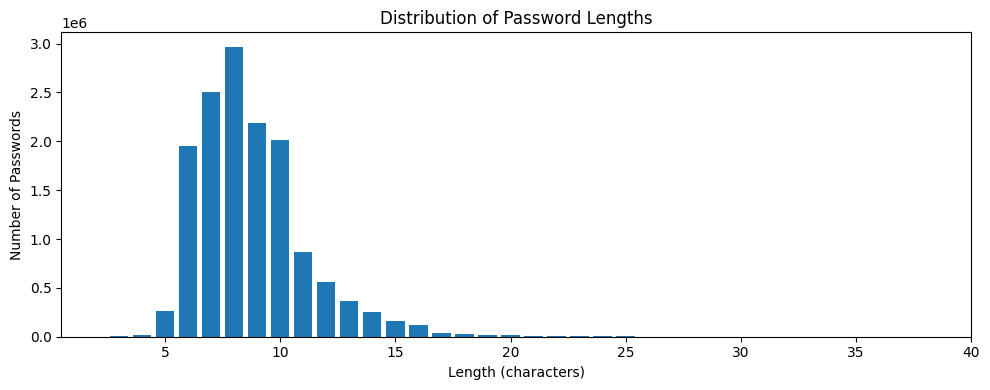

In [59]:
lengths = [len(pw) for pw in ROCKYOU_COUNTS]
length_counts = Counter(lengths)

plt.figure(figsize=(10,4))
plt.bar(length_counts.keys(), length_counts.values(), width=0.8)

plt.xlim(0.5, 40)

plt.title("Distribution of Password Lengths")
plt.xlabel("Length (characters)")
plt.ylabel("Number of Passwords")
plt.tight_layout()
plt.show()

In [60]:
max_len = max(length_counts.keys())
print("Max password length:", max_len)

num_long = sum([1 for i in lengths if i > 25])
print("Number of unique passwords with length > 25:", num_long)

Max password length: 285
Number of unique passwords with length > 25: 9012


##extract feature

In [61]:
bigram_counts = Counter()
trigram_counts = Counter()
total_bigrams = total_trigrams = 0

for pw in ROCKYOU_COUNTS:
    # bigrams
    for a, b in zip(pw, pw[1:]):
        bigram_counts[(a, b)] += 1
        total_bigrams += 1
    # trigrams
    for a, b, c in zip(pw, pw[1:], pw[2:]):
        trigram_counts[(a, b, c)] += 1
        total_trigrams += 1


bigram_probs = {bg: cnt/total_bigrams for bg, cnt in bigram_counts.items()}
tri_mean = np.mean(list(trigram_counts.values()))
tri_std  = np.std(list(trigram_counts.values()))

In [62]:
def transition_entropy(pw: str) -> float:

    h = 0.0
    for a, b in zip(pw, pw[1:]):
        p = bigram_probs.get((a, b), 1e-8)
        h -= math.log2(p)
    return h / max(len(pw)-1, 1)

In [63]:

coords = {}

row0 = ['`', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '-', '=']
shift_map = {'1':'!','2':'@','3':'#','4':'$','5':'%','6':'^','7':'&','8':'*','9':'(','0':')','-':'_','=':'+'}
for i, key in enumerate(row0):
    coords[key] = (i, 0)            # base key at y=0
    if key in shift_map:
        coords[shift_map[key]] = (i, 0)  # shifted symbol shares same position

row1 = list("qwertyuiop") + ['[',']','\\']
for i, key in enumerate(row1):
    x = i + 0.5
    coords[key] = (x, 1)            # lowercase
    coords[key.upper()] = (x, 1)    # uppercase

row2 = list("asdfghjkl") + [';','\'']
for i, key in enumerate(row2):
    coords[key] = (i, 2)
    coords[key.upper()] = (i, 2)

row3 = list("zxcvbnm") + [',','.','/']
for i, key in enumerate(row3):
    x = i + 1.0
    coords[key] = (x, 3)
    coords[key.upper()] = (x, 3)

coords[' '] = ((len(row0) - 1) / 2, 4)  # roughly middle of number row

# Explanation:
# - Each key is mapped to an (x, y) coordinate for path-length computation.
# - Rows 1 and 3 are horizontally offset to reflect actual keyboard stagger.
# - Shifted symbols (e.g. '!' on '1') share the same coordinate as their base key.
# - Spacebar is placed centrally below all other rows.
coords

{'`': (0, 0),
 '1': (1, 0),
 '!': (1, 0),
 '2': (2, 0),
 '@': (2, 0),
 '3': (3, 0),
 '#': (3, 0),
 '4': (4, 0),
 '$': (4, 0),
 '5': (5, 0),
 '%': (5, 0),
 '6': (6, 0),
 '^': (6, 0),
 '7': (7, 0),
 '&': (7, 0),
 '8': (8, 0),
 '*': (8, 0),
 '9': (9, 0),
 '(': (9, 0),
 '0': (10, 0),
 ')': (10, 0),
 '-': (11, 0),
 '_': (11, 0),
 '=': (12, 0),
 '+': (12, 0),
 'q': (0.5, 1),
 'Q': (0.5, 1),
 'w': (1.5, 1),
 'W': (1.5, 1),
 'e': (2.5, 1),
 'E': (2.5, 1),
 'r': (3.5, 1),
 'R': (3.5, 1),
 't': (4.5, 1),
 'T': (4.5, 1),
 'y': (5.5, 1),
 'Y': (5.5, 1),
 'u': (6.5, 1),
 'U': (6.5, 1),
 'i': (7.5, 1),
 'I': (7.5, 1),
 'o': (8.5, 1),
 'O': (8.5, 1),
 'p': (9.5, 1),
 'P': (9.5, 1),
 '[': (10.5, 1),
 ']': (11.5, 1),
 '\\': (12.5, 1),
 'a': (0, 2),
 'A': (0, 2),
 's': (1, 2),
 'S': (1, 2),
 'd': (2, 2),
 'D': (2, 2),
 'f': (3, 2),
 'F': (3, 2),
 'g': (4, 2),
 'G': (4, 2),
 'h': (5, 2),
 'H': (5, 2),
 'j': (6, 2),
 'J': (6, 2),
 'k': (7, 2),
 'K': (7, 2),
 'l': (8, 2),
 'L': (8, 2),
 ';': (9, 2),
 "'": 

In [64]:
def keyboard_path_length(pw: str) -> float:

    d = 0.0
    for a, b in zip(pw.lower(), pw.lower()[1:]):
        if a in coords and b in coords:
            x1, y1 = coords[a]
            x2, y2 = coords[b]
            d += math.hypot(x2-x1, y2-y1)
    return d

In [65]:
top_keys = [pw for pw,_ in sorted(ROCKYOU_COUNTS.items(), key=lambda x:-x[1])[:1000]]

In [66]:
def min_levenshtein(pw: str) -> int:
    return min(Levenshtein.distance(pw, ref) for ref in top_keys)

In [67]:
import re

single_char_map = {
    '4': 'a', '@': 'a',
    '3': 'e', '£': 'e',
    '1': 'i', '!': 'i', '|': 'i',
    '0': 'o', 'º': 'o',
    '5': 's', '$': 's', '§': 's',
    '7': 't', '+': 't',
    '2': 'z', '¿': 'z',
    '8': 'b',
    '6': 'g', '9': 'g',
    '¢': 'c', '(': 'c',
    '∆': 'd',
    '¶': 'p',
}
l33t_map = str.maketrans(single_char_map)

# 2) Multi‐char patterns
multi_char_patterns = [
    (r'\|\)', 'd'),  # "|)" → d
    (r'\|>', 'p'),  # "|>" → p
]

def normalize_leet(pw: str) -> str:
    """
    1) Apply single-char translate
    2) Apply regex substitutions for multi-char patterns
    """
    out = pw.lower().translate(l33t_map)
    for pattern, repl in multi_char_patterns:
        out = re.sub(pattern, repl, out)
    return out

In [68]:
def l33t_ratio(pw: str) -> float:

    lower = pw.lower()
    trans = lower.translate(l33t_map)
    changes = sum(1 for a, b in zip(lower, trans) if a != b)
    return changes / max(len(pw), 1)

In [69]:
def longest_repeated_substring_frac(s: str) -> float:

    best = 0
    n = len(s)
    for i in range(n):
        for j in range(i+1, n):
            l = 0
            while j+l < n and s[i+l] == s[j+l]:
                l += 1
            best = max(best, l)
    return best / max(n, 1)

In [70]:
def class_transitions(pw: str) -> float:

    def cls(c):
        if c.islower(): return 0
        if c.isupper(): return 1
        if c.isdigit(): return 2
        return 3
    trans = sum(1 for a, b in zip(pw, pw[1:]) if cls(a) != cls(b))
    return trans / max(len(pw)-1, 1)

In [71]:
def trigram_burstiness(pw: str) -> float:

    vals = []
    for tri in zip(pw, pw[1:], pw[2:]):
        cnt = trigram_counts.get(tri, 0)
        vals.append((cnt - tri_mean) / (tri_std + 1e-9))
    return float(np.mean(vals)) if vals else 0.0

In [72]:

sample_size = 200_000
random.seed(42)
sample_items = random.sample(list(ROCKYOU_COUNTS.items()), sample_size)

passwords, counts = zip(*sample_items)
df = pd.DataFrame({
    'password': passwords,
    'rockyou_count': counts
})

df['trans_entropy'] = df['password'].apply(transition_entropy)
df['kbd_path']      = df['password'].apply(keyboard_path_length)
df['lev_dist']      = df['password'].apply(min_levenshtein)
df['l33t_ratio']    = df['password'].apply(l33t_ratio)
df['repeat_frac']   = df['password'].apply(longest_repeated_substring_frac)
df['class_trans']   = df['password'].apply(class_transitions)
df['tri_burst']     = df['password'].apply(trigram_burstiness)


df['rockyou_log'] = np.log1p(df['rockyou_count'])
scaler = StandardScaler()
df['rockyou_scaled'] = scaler.fit_transform(df[['rockyou_log']])


In [73]:
df

,password,rockyou_count,trans_entropy,kbd_path,lev_dist,l33t_ratio,repeat_frac,class_trans,tri_burst,rockyou_log,rockyou_scaled
0,Perro007,1,9.429357,17.802776,5,0.375000,0.125000,0.285714,9.384102,0.693147,-0.329294
1,demetrio2,2,8.900980,25.543365,5,0.111111,0.111111,0.125000,7.473450,1.098612,0.619936
2,francis6,6,9.131305,30.726918,1,0.125000,0.000000,0.142857,11.303156,1.945910,2.603535
3,411591a,1,9.023572,21.236068,4,0.857143,0.142857,0.166667,8.223191,0.693147,-0.329294
4,plopkiuj3,1,11.043532,13.455011,5,0.111111,0.111111,0.125000,1.106688,0.693147,-0.329294
...,...,...,...,...,...,...,...,...,...,...,...
199995,8231560,1,8.382845,18.000000,3,1.000000,0.000000,0.000000,9.030277,0.693147,-0.329294
199996,skip2gfree,1,10.623087,22.630868,6,0.100000,0.100000,0.222222,5.176444,0.693147,-0.329294
199997,109861809269,1,8.358018,42.000000,7,1.000000,0.166667,0.000000,10.886983,0.693147,-0.329294
199998,urfitabbi,1,9.420977,24.638160,5,0.000000,0.111111,0.000000,8.497865,0.693147,-0.329294


##eval

In [74]:
!pip install zxcvbn-python

In [75]:
from zxcvbn import zxcvbn

def zxcvbn_label(pw: str) -> str:
    score = zxcvbn(pw)['score']
    labels = {
        0: "Very Weak",
        1: "Weak",
        2: "Fair",
        3: "Strong",
        4: "Very Strong"
    }
    return labels[score]

df['strength_label'] = df['password'].apply(zxcvbn_label)

In [76]:
df

,password,rockyou_count,trans_entropy,kbd_path,lev_dist,l33t_ratio,repeat_frac,class_trans,tri_burst,rockyou_log,rockyou_scaled,strength_label
0,Perro007,1,9.429357,17.802776,5,0.375000,0.125000,0.285714,9.384102,0.693147,-0.329294,Fair
1,demetrio2,2,8.900980,25.543365,5,0.111111,0.111111,0.125000,7.473450,1.098612,0.619936,Weak
2,francis6,6,9.131305,30.726918,1,0.125000,0.000000,0.142857,11.303156,1.945910,2.603535,Weak
3,411591a,1,9.023572,21.236068,4,0.857143,0.142857,0.166667,8.223191,0.693147,-0.329294,Fair
4,plopkiuj3,1,11.043532,13.455011,5,0.111111,0.111111,0.125000,1.106688,0.693147,-0.329294,Strong
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,8231560,1,8.382845,18.000000,3,1.000000,0.000000,0.000000,9.030277,0.693147,-0.329294,Weak
199996,skip2gfree,1,10.623087,22.630868,6,0.100000,0.100000,0.222222,5.176444,0.693147,-0.329294,Strong
199997,109861809269,1,8.358018,42.000000,7,1.000000,0.166667,0.000000,10.886983,0.693147,-0.329294,Very Strong
199998,urfitabbi,1,9.420977,24.638160,5,0.000000,0.111111,0.000000,8.497865,0.693147,-0.329294,Strong


##simple feature

In [77]:
import re
import math
from collections import Counter
import pandas as pd

def calculate_shannon_entropy(password: str) -> float:
    if not password:
        return 0.0
    freq = Counter(password)
    length = len(password)
    entropy_per_char = -sum((count/length) * math.log2(count/length) for count in freq.values())
    return entropy_per_char * length

common_years = [str(y) for y in range(1900, 2030)]
COMMON_PATTERNS = [
    r'(?i)password', r'(?i)123456', r'(?i)qwerty', r'(?i)letmein',
    r'(?i)admin', r'(?i)welcome', r'(?i)abc123', r'(?i)monkey',
    r'(?i)dragon', r'(?i)football', r'(?i)iloveyou', r'(?i)om[a|e]r',
    r'(?i)jessica', r'(?i)john', r'(?i)199\d', r'(?i)202\d',
    r'(.)\1{2,}',  # repeated chars
] + [rf'(?i){year}' for year in common_years]

def contains_common_pattern(password: str) -> bool:
    pw_lower = password.lower()
    return any(re.search(pat, pw_lower) for pat in COMMON_PATTERNS)

KEYBOARD_ROWS = ["qwertyuiop", "asdfghjkl", "zxcvbnm"]

def contains_keyboard_sequence(password: str, length: int = 3) -> bool:
    pw_lower = password.lower()
    for row in KEYBOARD_ROWS:
        for seq in (row, row[::-1]):
            if any(seq[i:i+length] in pw_lower for i in range(len(seq)-length+1)):
                return True
    return False

def contains_alpha_sequence(password: str, length: int = 3) -> bool:
    pw_lower = password.lower()
    alpha = "abcdefghijklmnopqrstuvwxyz"
    digits = "0123456789"
    for seq in (alpha, alpha[::-1], digits, digits[::-1]):
        if any(seq[i:i+length] in pw_lower for i in range(len(seq)-length+1)):
            return True
    return False

def contains_repetition(password: str) -> bool:
    return bool(re.search(r"(.+)\1+", password))

def extract_features(password: str) -> dict:
    length  = len(password)
    upper   = sum(1 for c in password if c.isupper())
    lower   = sum(1 for c in password if c.islower())
    digits  = sum(1 for c in password if c.isdigit())
    symbols = sum(1 for c in password if not c.isalnum())
    entropy = calculate_shannon_entropy(password)
    return {
        'length': length,
        'upper': upper,
        'lower': lower,
        'digits': digits,
        'symbols': symbols,
        'entropy': entropy,
        'has_common_pattern': int(contains_common_pattern(password)),
        'has_keyboard_seq':      int(contains_keyboard_sequence(password)),
        'has_alpha_seq':         int(contains_alpha_sequence(password)),
        'has_repetition':        int(contains_repetition(password)),
    }


feats = df['password'].apply(extract_features).tolist()
feat_df = pd.DataFrame(feats)
df = pd.concat([df.reset_index(drop=True), feat_df], axis=1)

print(df.head())

    password  rockyou_count  trans_entropy   kbd_path  lev_dist  l33t_ratio  \
0   Perro007              1       9.429357  17.802776         5    0.375000   
1  demetrio2              2       8.900980  25.543365         5    0.111111   
2   francis6              6       9.131305  30.726918         1    0.125000   
3    411591a              1       9.023572  21.236068         4    0.857143   
4  plopkiuj3              1      11.043532  13.455011         5    0.111111   

   repeat_frac  class_trans  tri_burst  rockyou_log  ...  length upper  lower  \
0     0.125000     0.285714   9.384102     0.693147  ...       8     1      4   
1     0.111111     0.125000   7.473450     1.098612  ...       9     0      8   
2     0.000000     0.142857  11.303156     1.945910  ...       8     0      7   
3     0.142857     0.166667   8.223191     0.693147  ...       7     0      1   
4     0.111111     0.125000   1.106688     0.693147  ...       9     0      8   

   digits  symbols    entropy  has_com

In [78]:
df

,password,rockyou_count,trans_entropy,kbd_path,lev_dist,l33t_ratio,repeat_frac,class_trans,tri_burst,rockyou_log,...,length,upper,lower,digits,symbols,entropy,has_common_pattern,has_keyboard_seq,has_alpha_seq,has_repetition
0,Perro007,1,9.429357,17.802776,5,0.375000,0.125000,0.285714,9.384102,0.693147,...,8,1,4,3,0,20.000000,0,0,0,1
1,demetrio2,2,8.900980,25.543365,5,0.111111,0.111111,0.125000,7.473450,1.098612,...,9,0,8,1,0,26.529325,0,0,0,0
2,francis6,6,9.131305,30.726918,1,0.125000,0.000000,0.142857,11.303156,1.945910,...,8,0,7,1,0,24.000000,0,0,0,0
3,411591a,1,9.023572,21.236068,4,0.857143,0.142857,0.166667,8.223191,0.693147,...,7,0,1,6,0,14.896597,0,0,0,1
4,plopkiuj3,1,11.043532,13.455011,5,0.111111,0.111111,0.125000,1.106688,0.693147,...,9,0,8,1,0,26.529325,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,8231560,1,8.382845,18.000000,3,1.000000,0.000000,0.000000,9.030277,0.693147,...,7,0,0,7,0,19.651484,0,0,0,0
199996,skip2gfree,1,10.623087,22.630868,6,0.100000,0.100000,0.222222,5.176444,0.693147,...,10,0,9,1,0,31.219281,0,0,0,1
199997,109861809269,1,8.358018,42.000000,7,1.000000,0.166667,0.000000,10.886983,0.693147,...,12,0,0,12,0,30.264663,0,0,0,0
199998,urfitabbi,1,9.420977,24.638160,5,0.000000,0.111111,0.000000,8.497865,0.693147,...,9,0,9,0,0,24.529325,0,0,0,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   password            200000 non-null  object 
 1   rockyou_count       200000 non-null  int64  
 2   trans_entropy       200000 non-null  float64
 3   kbd_path            200000 non-null  float64
 4   lev_dist            200000 non-null  int64  
 5   l33t_ratio          200000 non-null  float64
 6   repeat_frac         200000 non-null  float64
 7   class_trans         200000 non-null  float64
 8   tri_burst           200000 non-null  float64
 9   rockyou_log         200000 non-null  float64
 10  rockyou_scaled      200000 non-null  float64
 11  strength_label      200000 non-null  object 
 12  length              200000 non-null  int64  
 13  upper               200000 non-null  int64  
 14  lower               200000 non-null  int64  
 15  digits              200000 non-nul

#Model

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

In [81]:
le = LabelEncoder()
y = le.fit_transform(df['strength_label'])

X = df.drop(columns=['password', 'strength_label'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)


models = {
    'XGBoost': XGBClassifier(tree_method='hist', device='cuda', eval_metric='mlogloss'),
    'RandomForest': RandomForestClassifier(class_weight='balanced', n_jobs=-1),
    'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1)
}

In [82]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
    results[name] = {'accuracy': acc, 'report': report}

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:24] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:24] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


In [83]:
for name, res in results.items():
    print(f"{name} Accuracy: {res['accuracy']:.2f}")

XGBoost Accuracy: 0.74
RandomForest Accuracy: 0.72
LogisticRegression Accuracy: 0.59


In [84]:
import pandas as pd
import numpy as np

def prepare_full_single(pw: str) -> dict:
    d = extract_features(pw)
    cnt = ROCKYOU_COUNTS.get(pw, 0)
    d['rockyou_count'] = cnt
    d['rockyou_log']   = np.log1p(cnt)
    d['rockyou_scaled']= (np.log1p(cnt) - df['rockyou_log'].mean()) / df['rockyou_log'].std()

    d['trans_entropy'] = transition_entropy(pw)
    d['kbd_path']      = keyboard_path_length(pw)
    d['lev_dist']      = min_levenshtein(pw)
    d['l33t_ratio']    = l33t_ratio(pw)
    d['repeat_frac']   = longest_repeated_substring_frac(pw)
    d['class_trans']   = class_transitions(pw)
    d['tri_burst']     = trigram_burstiness(pw)
    return d

def prepare_full_dataframe(passwords: list[str]) -> pd.DataFrame:
    feats = [prepare_full_single(pw) for pw in passwords]
    df_new = pd.DataFrame(feats)

    cols = X.columns
    return df_new[cols]

def predict_strength(passwords: list[str], model) -> pd.DataFrame:
    ref_labels = [zxcvbn_label(pw) for pw in passwords]
    X_new = prepare_full_dataframe(passwords)
    preds = model.predict(X_new)
    pred_labels = le.inverse_transform(preds)
    return pd.DataFrame({
        'password': passwords,
        'zxcvbn_label': ref_labels,
        'model_label':  pred_labels
    })

best_model = models['XGBoost']  # بعد التدريب
test_pw = [
    "123456",
    "password",
    "letmein",
    "qwerty",
    "asdf1234",

    "P@ssw0rd!",
    "S3cur3P@$$",
    "Tr0ub4dor&3",


    "11111111",
    "abcabcabc",

    "abcdefg",
    "gfedcba",
    "789012",

    "CorrectHorseBatteryStaple",
    "Az$9vT%3Kb",
    "1qaz2wsx",

    "20231010",


    "G7r7!kL3pB8q",

    "poiuytrewq",

    "MyPuppyIsC00l",
]


results = predict_strength(test_pw, best_model)



In [85]:
results

,password,zxcvbn_label,model_label
0,123456,Very Weak,Weak
1,password,Very Weak,Weak
2,letmein,Very Weak,Weak
3,qwerty,Very Weak,Very Weak
4,asdf1234,Very Weak,Weak
5,P@ssw0rd!,Weak,Weak
6,S3cur3P@$$,Fair,Strong
7,Tr0ub4dor&3,Very Strong,Fair
8,11111111,Very Weak,Very Weak
9,abcabcabc,Very Weak,Weak


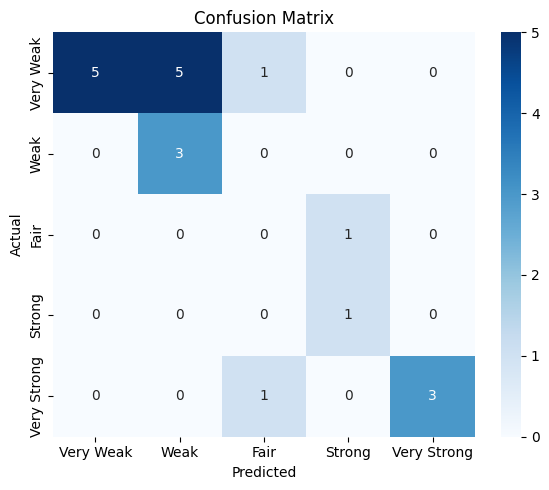

              precision    recall  f1-score   support

   Very Weak       1.00      0.45      0.62        11
        Weak       0.38      1.00      0.55         3
        Fair       0.00      0.00      0.00         1
      Strong       0.50      1.00      0.67         1
 Very Strong       1.00      0.75      0.86         4

    accuracy                           0.60        20
   macro avg       0.57      0.64      0.54        20
weighted avg       0.83      0.60      0.63        20



In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


labels = ["Very Weak", "Weak", "Fair", "Strong", "Very Strong"]

cm = confusion_matrix(
    results["zxcvbn_label"],
    results["model_label"],
    labels=labels
)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

print(classification_report(
    results["zxcvbn_label"],
    results["model_label"],
    labels=labels
))

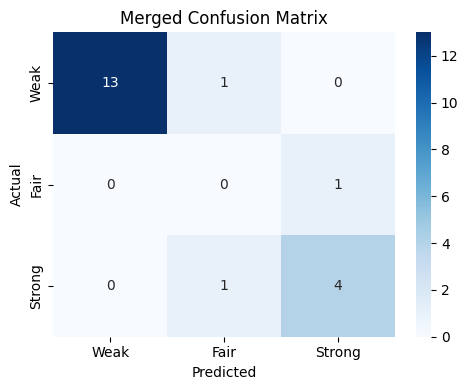

              precision    recall  f1-score   support

        Weak       1.00      0.93      0.96        14
        Fair       0.00      0.00      0.00         1
      Strong       0.80      0.80      0.80         5

    accuracy                           0.85        20
   macro avg       0.60      0.58      0.59        20
weighted avg       0.90      0.85      0.87        20



In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

merge_map = {
    "Very Weak": "Weak",
    "Weak":      "Weak",
    "Fair":      "Fair",
    "Strong":    "Strong",
    "Very Strong":"Strong"
}

merged_true  = results["zxcvbn_label"].map(merge_map)
merged_pred  = results["model_label"].map(merge_map)

merged_labels = ["Weak", "Fair", "Strong"]

cm2 = confusion_matrix(merged_true, merged_pred, labels=merged_labels)

plt.figure(figsize=(5,4))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues",
            xticklabels=merged_labels, yticklabels=merged_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Merged Confusion Matrix")
plt.tight_layout()
plt.show()

print(classification_report(
    merged_true, merged_pred, labels=merged_labels
))

#brute_force

In [88]:
import kagglehub

path = kagglehub.dataset_download("lako65/ssh-brute-force-ipuserpassword")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ssh-brute-force-ipuserpassword


In [89]:
import os

json_path = os.path.join(path, "brute_force_data.json")
with open(json_path, 'r', encoding='utf-8') as f:
    for i in range(20):
        line = f.readline()
        print(f"Line {i+1}:", line)

Line 1: ﻿[

Line 2:     {

Line 3:         "username":  "albert",

Line 4:         "timestamp":  "Mon Nov  5 08:31:18 2018",

Line 5:         "passwords":  [

Line 6:                           "\u0000\u0000\b\u0000\u0000\u0000\b\u0000",

Line 7:                           "albert",

Line 8:                           "123456"

Line 9:                       ],

Line 10:         "foreign_ip":  "109.87.224.151"

Line 11:     },

Line 12:     {

Line 13:         "username":  "root",

Line 14:         "timestamp":  "Mon Nov  5 22:16:56 2018",

Line 15:         "passwords":  [

Line 16:                           "digi",

Line 17:                           "daddy913",

Line 18:                           "covergirl"

Line 19:                       ],

Line 20:         "foreign_ip":  "122.226.181.166"



In [90]:
import pandas as pd
import os

json_path = os.path.join(path, "brute_force_data.json")

df = pd.read_json(json_path, encoding='utf-8-sig')

df['timestamp'] = pd.to_datetime(df['timestamp'])

def safe_eval(val):
    try:
        return literal_eval(val) if pd.notnull(val) else []
    except:
        return []

df['passwords'] = df['passwords'].apply(safe_eval)
df.head()

,username,timestamp,passwords,foreign_ip
0,albert,2018-11-05 08:31:18,[],109.87.224.151
1,root,2018-11-05 22:16:56,[],122.226.181.166
2,root,2018-11-05 07:18:16,[],42.7.27.166
3,root,2018-11-03 19:30:58,[],125.65.42.181
4,root,2018-11-05 08:53:41,[],61.184.247.12


In [91]:
common_usernames = {'root', 'admin', 'test', 'user', 'guest'}

def extract_features(row):
    passwords = [p for p in row['passwords'] if isinstance(p, str)]
    num_passwords = len(passwords)
    avg_pw_len = np.mean([len(p) for p in passwords]) if passwords else 0
    hour = row['timestamp'].hour
    username_length = len(row['username'])
    is_common_user = int(row['username'].lower() in common_usernames)
    return [num_passwords, avg_pw_len, hour, username_length, is_common_user]

X_attack = df.apply(extract_features, axis=1).tolist()
y_attack = [1] * len(X_attack)

In [92]:
import random
from datetime import datetime

normal_rows = []
for _ in range(len(df) // 2):
    username = random.choice(['james', 'sarah', 'client42', 'omar2024'])
    timestamp = datetime(2023, 5, 10, random.randint(6, 22), random.randint(0, 59))
    passwords = [random.choice(['hello2024', 'mySecurePass!'])]
    normal_rows.append([username, timestamp, '192.168.1.1', passwords])

df_normal = pd.DataFrame(normal_rows, columns=['username', 'timestamp', 'foreign_ip', 'passwords'])

X_normal = df_normal.apply(extract_features, axis=1).tolist()
y_normal = [0] * len(X_normal)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = X_attack + X_normal
y = y_attack + y_normal

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2219
           1       1.00      1.00      1.00      4439

    accuracy                           1.00      6658
   macro avg       1.00      1.00      1.00      6658
weighted avg       1.00      1.00      1.00      6658



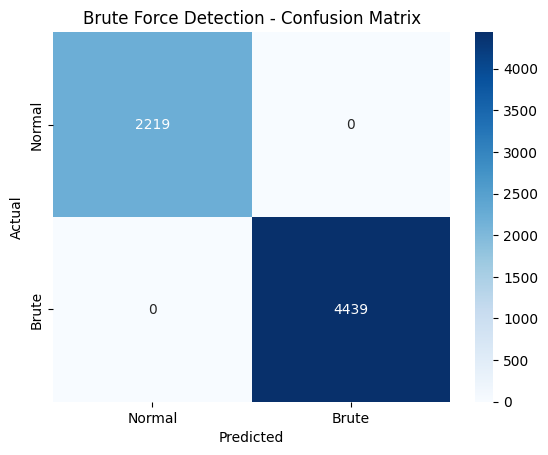

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Brute'], yticklabels=['Normal', 'Brute'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Brute Force Detection - Confusion Matrix")
plt.show()

In [95]:
from datetime import datetime


expanded_test_data = [

    {"username": "alice", "passwords": ["alice2024"], "timestamp": pd.to_datetime("2023-05-01 10:00:00"), "foreign_ip": "192.168.1.1", "label": 0},
    {"username": "bob", "passwords": ["bobSecure!"], "timestamp": pd.to_datetime("2023-05-01 10:15:00"), "foreign_ip": "192.168.1.2", "label": 0},
    {"username": "charlie", "passwords": ["charlie123"], "timestamp": pd.to_datetime("2023-05-01 10:30:00"), "foreign_ip": "192.168.1.3", "label": 0},
    {"username": "david", "passwords": ["DavidPass#2024"], "timestamp": pd.to_datetime("2023-05-01 11:00:00"), "foreign_ip": "192.168.1.4", "label": 0},
    {"username": "eve", "passwords": ["Eve123!Pass"], "timestamp": pd.to_datetime("2023-05-01 11:30:00"), "foreign_ip": "192.168.1.5", "label": 0},
    {"username": "frank", "passwords": ["Frank@2023"], "timestamp": pd.to_datetime("2023-05-01 12:00:00"), "foreign_ip": "192.168.1.6", "label": 0},
    {"username": "grace", "passwords": ["Grace$pass"], "timestamp": pd.to_datetime("2023-05-01 12:30:00"), "foreign_ip": "192.168.1.7", "label": 0},
    {"username": "hannah", "passwords": ["Hannah2024!"], "timestamp": pd.to_datetime("2023-05-01 13:00:00"), "foreign_ip": "192.168.1.8", "label": 0},
    {"username": "ian", "passwords": ["Ian123!pass"], "timestamp": pd.to_datetime("2023-05-01 13:30:00"), "foreign_ip": "192.168.1.9", "label": 0},

    {"username": "root", "passwords": ["root123", "password123", "admin", "root1234", "letmein", "root", "admin123", "qwerty", "rootadmin", "password"], "timestamp": pd.to_datetime("2023-05-01 14:00:00"), "foreign_ip": "203.0.113.5", "label": 1},
    {"username": "admin", "passwords": ["admin123", "qwerty", "letmein", "root", "admin", "welcome"], "timestamp": pd.to_datetime("2023-05-01 14:30:00"), "foreign_ip": "203.0.113.6", "label": 1},
    {"username": "test", "passwords": ["test123", "abc123", "1234", "password", "test@123", "letmein"], "timestamp": pd.to_datetime("2023-05-01 15:00:00"), "foreign_ip": "203.0.113.7", "label": 1},
    {"username": "guest", "passwords": ["guest123", "letmein", "root123", "1234", "password", "welcome", "guest"], "timestamp": pd.to_datetime("2023-05-01 15:30:00"), "foreign_ip": "203.0.113.8", "label": 1},
    {"username": "hacker", "passwords": ["hacker123", "qwerty", "iloveyou", "letmein", "password", "root", "123456", "hacker!123", "admin", "letmein123", "root123", "hacker2024"], "timestamp": pd.to_datetime("2023-05-01 16:00:00"), "foreign_ip": "203.0.113.9", "label": 1},

    ]


for test_case in expanded_test_data:
    row = test_case
    features = extract_features(row)
    prediction = model.predict([features])[0]
    print(f"Username: {row['username']}, Passwords: {row['passwords']}, IP: {row['foreign_ip']} => Predicted: {'Brute' if prediction == 1 else 'Normal'}")

Username: alice, Passwords: ['alice2024'], IP: 192.168.1.1 => Predicted: Normal
Username: bob, Passwords: ['bobSecure!'], IP: 192.168.1.2 => Predicted: Normal
Username: charlie, Passwords: ['charlie123'], IP: 192.168.1.3 => Predicted: Normal
Username: david, Passwords: ['DavidPass#2024'], IP: 192.168.1.4 => Predicted: Normal
Username: eve, Passwords: ['Eve123!Pass'], IP: 192.168.1.5 => Predicted: Normal
Username: frank, Passwords: ['Frank@2023'], IP: 192.168.1.6 => Predicted: Normal
Username: grace, Passwords: ['Grace$pass'], IP: 192.168.1.7 => Predicted: Normal
Username: hannah, Passwords: ['Hannah2024!'], IP: 192.168.1.8 => Predicted: Normal
Username: ian, Passwords: ['Ian123!pass'], IP: 192.168.1.9 => Predicted: Normal
Username: root, Passwords: ['root123', 'password123', 'admin', 'root1234', 'letmein', 'root', 'admin123', 'qwerty', 'rootadmin', 'password'], IP: 203.0.113.5 => Predicted: Normal
Username: admin, Passwords: ['admin123', 'qwerty', 'letmein', 'root', 'admin', 'welcome']

In [96]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

comparison = []

for test_case in expanded_test_data:
    row = test_case
    features = extract_features(row)
    prediction = model.predict([features])[0]

    comparison.append({
        "username": row["username"],
        "passwords": row["passwords"],
        "actual": "Brute" if row["label"] == 1 else "Normal",
        "predicted": "Brute" if prediction == 1 else "Normal"
    })

comparison_df = pd.DataFrame(comparison)
conf_matrix = confusion_matrix(comparison_df['actual'], comparison_df['predicted'], labels=["Normal", "Brute"])
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual Normal", "Actual Brute"], columns=["Predicted Normal", "Predicted Brute"])

print(conf_matrix_df)

               Predicted Normal  Predicted Brute
Actual Normal                 9                0
Actual Brute                  5                0
